<a href="https://colab.research.google.com/github/Rmm6699/HW/blob/master/W3_TA_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import numpy as np

## data
X = np.linspace(-5,5,200)
real_theta0 = 5
real_theta1 = 2

# sample noise from N(0,1)
N = 200
noise = np.random.randn(N) * 4
y = real_theta0 + real_theta1*X + noise
##

X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# Initialize w from N(0,1). 
w = torch.randn(2).requires_grad_(True) 
print(f"Initial w:\t{w.detach().numpy()}")

def model(X,w):
    return w[0] + X * w[1]

def cost_function(y_hat,y):
    return torch.mean((y_hat-y)**2)

iterations = 20
alpha = 0.05 # learning rate

# start training 
print('iter, loss,  w')
for i in range(iterations):
    y_hat = model(X,w)
    loss = cost_function(y_hat,y)
    loss.backward()

    # update w with gradient descent
    w.data = w.data - alpha * w.grad
    print('{},\t{:.2f},\t{}'.format(i, loss.item(), w.view(2).detach().numpy()))

    # clear gradients
    w.grad.detach()
    w.grad.zero_()

Initial w:	[-0.32221988  0.60497355]
iter, loss,  w
0,	62.35,	[0.21138892 1.8259209 ]
1,	39.67,	[0.6916368 2.0191863]
2,	34.85,	[1.1238599 2.0497785]
3,	31.29,	[1.5128607 2.054621 ]
4,	28.42,	[1.8629614 2.0553875]
5,	26.09,	[2.178052  2.0555089]
6,	24.20,	[2.4616334 2.0555282]
7,	22.67,	[2.716857  2.0555313]
8,	21.44,	[2.946558  2.0555317]
9,	20.43,	[3.1532888 2.0555317]
10,	19.62,	[3.3393466 2.0555317]
11,	18.97,	[3.5067987 2.0555317]
12,	18.43,	[3.6575055 2.0555317]
13,	18.00,	[3.7931418 2.0555317]
14,	17.65,	[3.9152143 2.0555317]
15,	17.37,	[4.0250797 2.0555317]
16,	17.14,	[4.1239586 2.0555317]
17,	16.95,	[4.2129493 2.0555317]
18,	16.80,	[4.293041  2.0555317]
19,	16.68,	[4.3651237 2.0555317]


## Inclass Exercise: Binary Classification
In this exercise, you have to implement a neural network to complete a binary classification task.

During the training step, you might want to **print the current loss** to make sure the convergence of your model.

Please define your network and carefully choose the activation and loss function.

When the training stage is finished, use `plot_decision_boundary` function to visualize the decision boundary of your model.

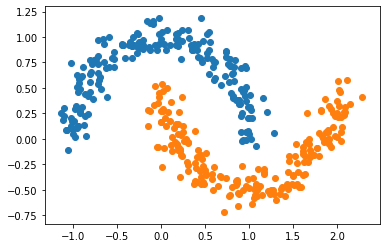

X shape (400, 2)
y shape (400,)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

X, y = sklearn.datasets.make_moons(400, noise=0.1)
X_a = X[y==0]
X_b = X[y==1]
plt.scatter(X_a[:,0],X_a[:,1])
plt.scatter(X_b[:,0],X_b[:,1])
plt.show()

print('X shape', X.shape)
print('y shape', y.shape)

In [ ]:
# Step 1: convert numpy array to torch tensor
tensor_x, tensor_y = torch.FloatTensor(X), torch.FloatTensor(y)

# Step 2: define your network
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)

# Step 3: choose a optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_function = nn.BCELoss()

# Step 4: start training
iterations = 100
for _ in range(iterations):
    output = model(tensor_x).flatten()
    y_pred = (output > 0.5) * 1. 
    acc = torch.mean((y_pred==tensor_y)*1.)
    loss = loss_function(output, tensor_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Loss: %.4f, Accuracy: %.4f" % (loss.data.numpy(), acc.detach().numpy()))

Loss: 0.6781, Accuracy: 0.5400
Loss: 0.5957, Accuracy: 0.7600
Loss: 0.4942, Accuracy: 0.7900
Loss: 0.3852, Accuracy: 0.8175
Loss: 0.3183, Accuracy: 0.8575
Loss: 0.3044, Accuracy: 0.8725
Loss: 0.2966, Accuracy: 0.8850
Loss: 0.2805, Accuracy: 0.8900
Loss: 0.2745, Accuracy: 0.8975
Loss: 0.2896, Accuracy: 0.8700
Loss: 0.2822, Accuracy: 0.8650
Loss: 0.2571, Accuracy: 0.8900
Loss: 0.2380, Accuracy: 0.8975
Loss: 0.2298, Accuracy: 0.8975
Loss: 0.2289, Accuracy: 0.8925
Loss: 0.2308, Accuracy: 0.8900
Loss: 0.2330, Accuracy: 0.8875
Loss: 0.2362, Accuracy: 0.8825
Loss: 0.2290, Accuracy: 0.8950
Loss: 0.2199, Accuracy: 0.9025
Loss: 0.2156, Accuracy: 0.9025
Loss: 0.2099, Accuracy: 0.9025
Loss: 0.2032, Accuracy: 0.9175
Loss: 0.2002, Accuracy: 0.9175
Loss: 0.2016, Accuracy: 0.9125
Loss: 0.2034, Accuracy: 0.9200
Loss: 0.1998, Accuracy: 0.9125
Loss: 0.1962, Accuracy: 0.9175
Loss: 0.1948, Accuracy: 0.9275
Loss: 0.1924, Accuracy: 0.9150
Loss: 0.1866, Accuracy: 0.9275
Loss: 0.1796, Accuracy: 0.9275
Loss: 0.

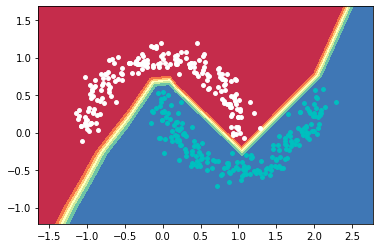

In [ ]:
# Reference: https://medium.com/@prudhvirajnitjsr/simple-classifier-using-pytorch-37fba175c25c
def predict(model, x):
    # Convert into numpy element to tensor
    x = torch.from_numpy(x).type(torch.FloatTensor)
    # Predict and return ans
    ans = model(x)
    return ans.detach().numpy()

def plot_decision_boundary(model, X, y):
    def pred_func(x): return predict(model, x)

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap="Spectral")
    X_a = X[y == 0]
    X_b = X[y == 1]
    plt.scatter(X_a[:, 0], X_a[:, 1], c="white", s=15)
    plt.scatter(X_b[:, 0], X_b[:, 1], c="c", s=15)
    plt.show()
    
# plot decision boundary
plot_decision_boundary(model, X, y)

## Handling large dataset: Mini-batch training

In real world, we always have to deal with datasets with large scale (e.g. millions of data).

In these cases, it is impractical for using gradient descent to optmize our parameters. 

Therefore, a more widely used method is to split the dataset into small batches and compute gradients based on the subset.

To utilize mimi-batch training, you need 
* Aggregate X and Y into `TensorDataset`
* Create `DataLoader` object and specify your batch size

In [ ]:
import torchvision
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# 獲取訓練集dataset  
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),]
)
training_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=True, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  
test_data = torchvision.datasets.MNIST(  
             root='./mnist/', # dataset儲存路徑  
             train=False, # True表示是train訓練集，False表示test測試集  
             transform=transform, # 將原資料規範化到（0,1）區間  
             download=True,  
             )  

train_x, train_y = training_data.data, training_data.targets
test_x, test_y = test_data.data, test_data.targets
print("Training size:",train_x.shape)
print("Testing size:",test_x.shape)

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw


Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw


Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw
Processing...



Done!
Training size: torch.Size([60000, 28, 28])
Testing size: torch.Size([10000, 28, 28])


C:\Users\USER\.conda\envs\py3.7\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


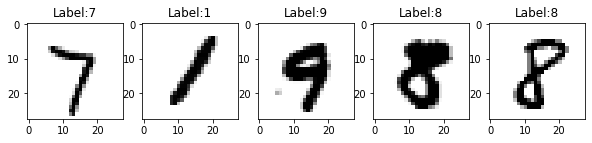

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn

samples = np.random.randint(0,train_x.size(0),size=5)
plt.figure(figsize=(10,7))
for i in range(1,6):
    plt.subplot(f"15{i}")
    plt.imshow(train_x[samples[i-1]].numpy(),cmap="binary")
    plt.title(f"Label:{train_y[samples[i-1]]}")

In [ ]:
# combine X and Y into tensordataset
train_dataset = TensorDataset(train_x, train_y)

# create a dataloader
# Note: you CAN NOT feed torch.tensor into dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4
)

for batch in train_loader:
    # batch is a tuple containing x and y
    batch_x, batch_y = batch
    print(batch_x.shape)
    print(batch_y.shape)
    break

torch.Size([32, 28, 28])
torch.Size([32])


In [ ]:
# define model and other configs
model = nn.Sequential(
          nn.Linear(28*28,256),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(256,128),
          nn.LeakyReLU(negative_slope=0.02),
          nn.Linear(128,10)
        )
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# combine dataloader with model training
num_epochs = 1
for epoch in range(num_epochs):
    for batch_idx, batch in enumerate(train_loader):
        batch_x, batch_y = batch
        batch_x = batch_x.float()
        output = model(batch_x.view(-1,28*28))
        loss = loss_func(output,batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 300 ==0:
            pred_y = torch.max(output,1)[1].data.squeeze()
            accuracy = sum(pred_y==batch_y) / float(batch_y.size(0))
            print("Loss: %.4f, Accuracy: %.4f" % (loss.item(), accuracy))

Loss: 10.3002, Accuracy: 0.0938
Loss: 0.1255, Accuracy: 0.9688
Loss: 0.1247, Accuracy: 0.9375
Loss: 0.2716, Accuracy: 0.9062
Loss: 0.2138, Accuracy: 0.9375
Loss: 0.2291, Accuracy: 0.9062
Loss: 0.1102, Accuracy: 0.9688
